In [14]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Import cleaned csv
cleandata = "../Resources/Cleaned.csv"

df = pd.read_csv(cleandata)
df.head(25)

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
0,0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
5,5,Das Loft,2019,48.212720,16.379310,Wien,Austria,1020,Modern cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
6,6,Pramerl & the Wolf,2019,48.209450,16.371740,Wien,Austria,1090,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
7,7,Walter Bauer,2019,48.209230,16.376720,Wien,Austria,1010,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
8,8,SHIKI,2019,48.204067,16.370980,Wien,Austria,1010,Japanese,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
9,9,Tian,2019,48.205130,16.374560,Wien,Austria,1010,Vegetarian,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1


In [16]:
df.cuisine.value_counts()

Modern cuisine       108
Contemporary          75
Japanese              54
Creative              46
Cantonese             40
                    ... 
Danish                 1
Moroccan               1
International          1
Market cuisine         1
Sichuan-Huai Yang      1
Name: cuisine, Length: 70, dtype: int64

In [17]:
df.cuisine.unique()

array(['Creative', 'Classic cuisine', 'Market cuisine', 'Modern cuisine',
       'Japanese', 'Vegetarian', 'Contemporary', 'Indian', 'Korean',
       'Californian', 'American', 'International', 'Moroccan', 'Thai',
       'Chinese', 'Fusion', 'Italian', 'French', 'Asian', 'Steakhouse',
       'Mexican', 'Gastropub', 'Danish', 'Classic French', 'Finnish',
       'Mediterranean', 'Seafood', 'Cantonese', 'Dim Sum', 'Teppanyaki',
       'Sushi', 'Shanghainese', 'Noodles and congee', 'Innovative',
       'Cantonese Roast Meats', 'Taizhou', 'Sichuan',
       'European contemporary', 'Scandinavian', 'Austrian', 'Spanish',
       'Modern British', 'modern', 'Asian influences', 'creative',
       'French contemporary', 'Korean contemporary', 'Temple cuisine',
       'Street Food', 'Fujian', 'Australian', 'Italian contemporary',
       'Barbecue', 'Peranakan', 'Meats and grills', 'Taiwanese',
       'Hang Zhou', 'Asian contemporary', 'Thai Contemporary',
       'Southern Thai', 'European', 'Creat

In [18]:
df.price.value_counts()

$$$$        197
No Price    176
$$$         143
$$           75
$$$$$        73
$            31
Name: price, dtype: int64

In [19]:
star_df = df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,549
1,2,110
2,3,36


What cuisine types are most popular in Michelin star restaurants?

In [20]:
df["cuisine"].unique

<bound method Series.unique of 0             Creative
1      Classic cuisine
2             Creative
3       Market cuisine
4       Modern cuisine
            ...       
690           Creative
691     Classic French
692             French
693           Japanese
694             French
Name: cuisine, Length: 695, dtype: object>

In [21]:
#Find amount of Michelin Star Restaurants by cuisine
cuisine_df = df["cuisine"].value_counts().reset_index()
cuisine_df.columns= ["Cuisine", "Count"]
cuisine_df

,Cuisine,Count
0,Modern cuisine,108
1,Contemporary,75
2,Japanese,54
3,Creative,46
4,Cantonese,40
...,...,...
65,Danish,1
66,Moroccan,1
67,International,1
68,Market cuisine,1


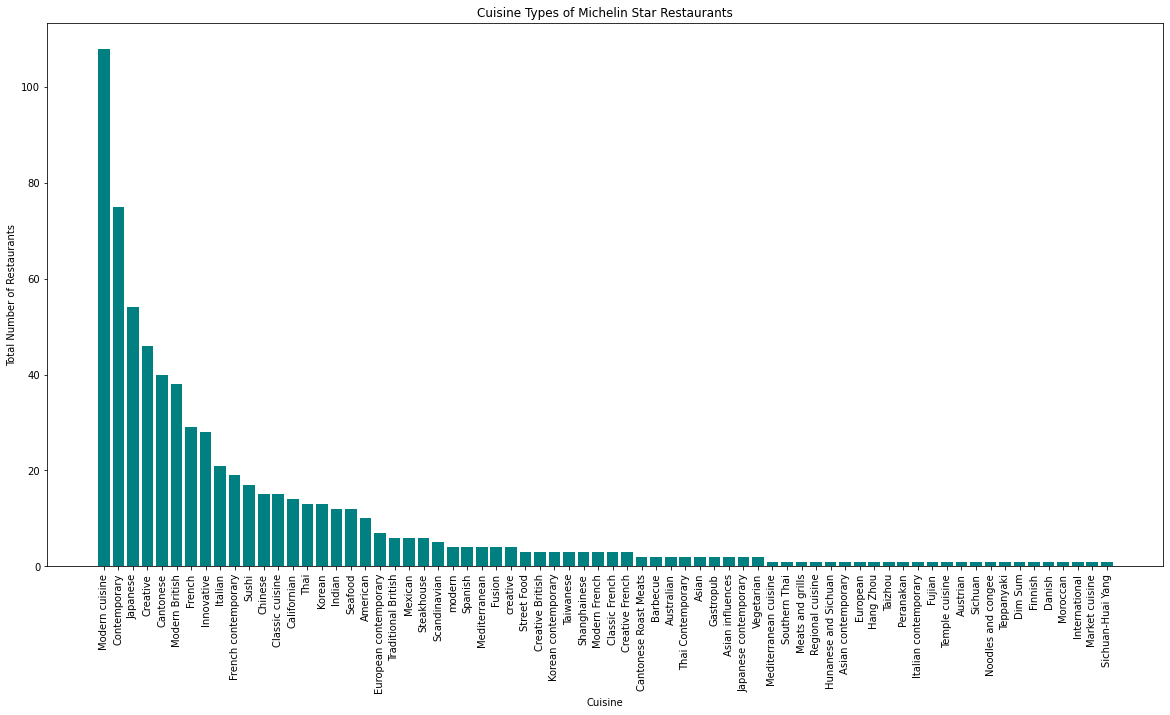

In [22]:
#Graph all Cuisine types b y count
plt.figure(figsize=(20,10))
plt.bar(cuisine_df["Cuisine"], cuisine_df["Count"], color= "teal")
plt.xticks(cuisine_df["Cuisine"], rotation='vertical')
plt.title("Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")

plt.show()

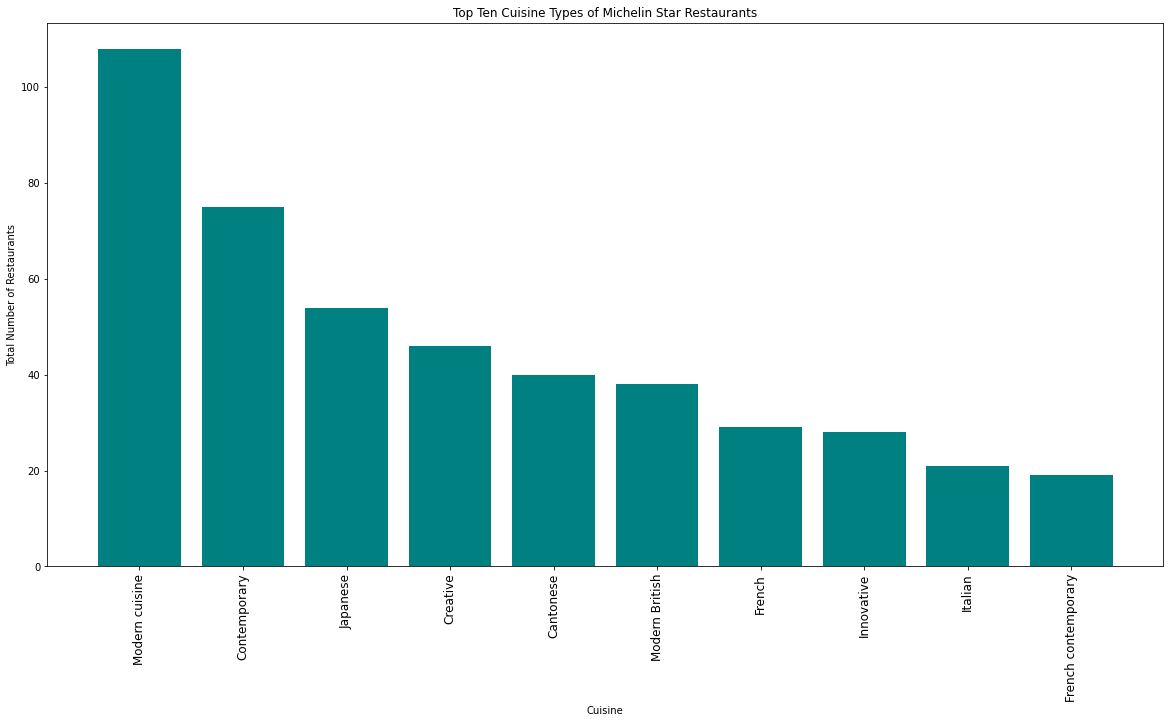

In [23]:
#Graph top ten cuisine types
top_cuisine= cuisine_df.head(10)
plt.figure(figsize=(20,10))
plt.bar(top_cuisine["Cuisine"], top_cuisine["Count"], color= "teal")
plt.xticks(top_cuisine["Cuisine"], rotation='vertical', fontsize= 12)
plt.title("Top Ten Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")

plt.show()

What proportion of Michelin star restaurants is one versus two versus three star restaurants?


In [24]:
star_df = df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,549
1,2,110
2,3,36


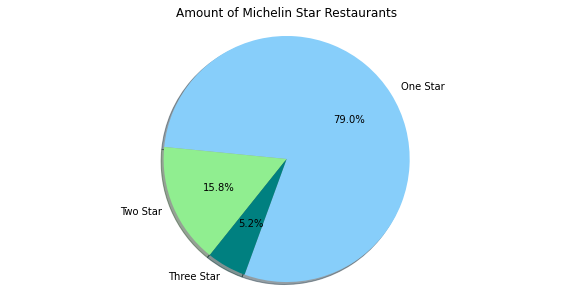

In [25]:
#Pie chart of Michelin Star restaurants globally
plt.figure(figsize=(10,5))
labels = ["One Star", "Two Star", "Three Star"]
colors = ["lightskyblue", "lightgreen", "teal"]
plt.pie(star_df["Count"], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.axis("equal")
plt.title("Amount of Michelin Star Restaurants")
plt.show()

What is the most frequent cuisine style by star rating?

In [26]:
top_cuisine

,Cuisine,Count
0,Modern cuisine,108
1,Contemporary,75
2,Japanese,54
3,Creative,46
4,Cantonese,40
5,Modern British,38
6,French,29
7,Innovative,28
8,Italian,21
9,French contemporary,19


In [27]:
mask= df["Michelin Star Count"]==1
one_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
one_star.columns= ["cuisine", "count"]
one_star_top=one_star.head(10)
one_star_top

,cuisine,count
0,Modern cuisine,97
1,Contemporary,47
2,Japanese,44
3,Modern British,34
4,Cantonese,31
5,Creative,29
6,Innovative,21
7,French,19
8,Italian,19
9,Classic cuisine,14


In [28]:
mask= df["Michelin Star Count"]==2
two_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
two_star.columns= ["cuisine", "count"]
two_star_top=two_star.head(10)
two_star_top

,cuisine,count
0,Contemporary,18
1,Creative,14
2,Modern cuisine,9
3,Japanese,8
4,French,7
5,French contemporary,7
6,Innovative,6
7,Cantonese,5
8,Sushi,4
9,Modern British,4


In [29]:
mask= df["Michelin Star Count"]==3
three_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
three_star.columns= ["cuisine", "count"]
three_star_top=three_star.head(10)
three_star_top

,cuisine,count
0,Contemporary,10
1,Cantonese,4
2,Creative,3
3,French,3
4,French contemporary,2
5,Japanese,2
6,Korean,2
7,Modern cuisine,2
8,American,1
9,Asian,1


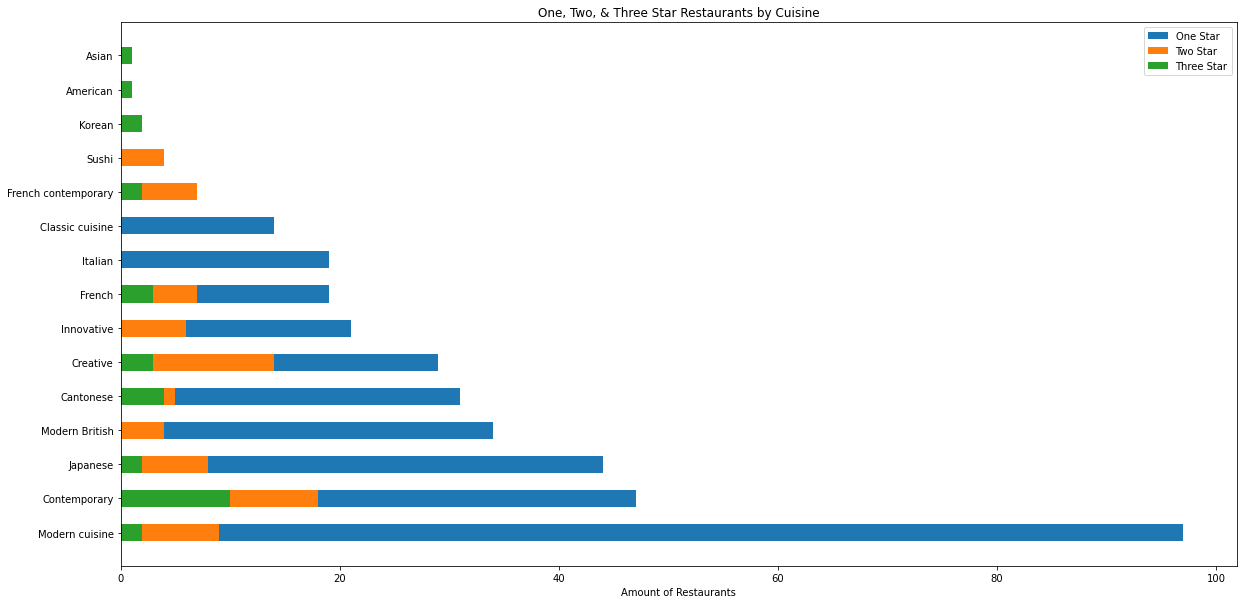

In [35]:
#Stacked Bar Chart
plt.figure(figsize=(20,10))
plt.barh(one_star_top["cuisine"], one_star_top["count"], 0.5, label= "One Star")
plt.barh(two_star_top["cuisine"], two_star_top["count"], 0.5, label= "Two Star")
plt.barh(three_star_top["cuisine"], three_star_top["count"], 0.5, label= "Three Star")
plt.xlabel("Amount of Restaurants")
plt.title("One, Two, & Three Star Restaurants by Cuisine")
plt.legend()
plt.show()
